In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
def reject_outliers(data, m=6):
    return data[abs(data - np.mean(data)) < m * np.std(data)]

In [71]:
# faz a leitura do ficheiro de dados localizado no github

url = 'https://raw.githubusercontent.com/Miguel-Salgado/covid-19/master/obitos-e-casos-confirmados-de-cov-data.csv'
df = pd.read_csv(url,error_bad_lines=False)


In [72]:
#print(len(df.index))
print(df)

     Dia_do_Ano  Dia  Confirmados  Obitos        Data
0            60    1            0       0  2020-03-05
1            61    2            2       0  2020-03-06
2            62    3            4       0  2020-03-07
3            63    4            6       0  2020-03-08
4            64    5            9       0  2020-03-09
..          ...  ...          ...     ...         ...
198         258  199        67176    1894  2020-09-18
199         259  200        68025    1899  2020-09-19
200         260  201        68577    1912  2020-09-20
201         261  202        69200    1920  2020-09-21
202         262  203        69663    1925  2020-09-22

[203 rows x 5 columns]


In [73]:
df['deltaConfirmados'] = df['Confirmados'].diff(1)
df['deltaObitos'] = df['Obitos'].diff(1)

In [74]:
#print(df)
d = np.array(df['deltaConfirmados'])
filtered_d = reject_outliers(d)
print(d,filtered_d)


[  nan    2.    2.    2.    3.    4.    8.    9.    9.    2.   18.   19.
   34.   57.   76.   86.  117.  194.  143.  235.  260.  320.  460.  302.
  633.  549.  724.  902.  792.  446. 1035.  808.  783.  852.  638.  754.
  452.  712.  699.  815. 1516.  515.  598.  349.  514.  643.  750.  181.
  663.  521.  657.  516.  603.  371.  444.  595.  472.  153.  305.  183.
  540.  306. -161.   92.  242.  178.  480.  533.  553.  138.  175.  332.
  219.  187.  264.  227.  226.  173.  223.  228.  252.  288.  271.  152.
  384.  285.  304.  350.  554.  200.  195.  366.  331.  377.  382.  534.
  421.  294.  310.  270.  283.  227.  346.  300.  336.  417.  375.  377.
  292.  259.  345.  367.  311.  451.  323.  457.  266.  229.  313.  328.
  374.  503.  238.  232.  287.  443.  618.  402.  342.  291.  306.  233.
  375.  339.  312.  313.  246.  135.  127.  252.  229.  313.  263.  209.
  135.  111.  203.  255.  204.  238.  153.  106.  112.  167.  213.  290.
  186.  131.    0.  157.  120.  278.  325.  235.  1

In [55]:
df['deltaConfirmados_MM'] = df.iloc[:,5].rolling(7).mean()
df['deltaObitos_MM'] = df.iloc[:,6].rolling(7).mean()

In [56]:
#print(df.head(20))

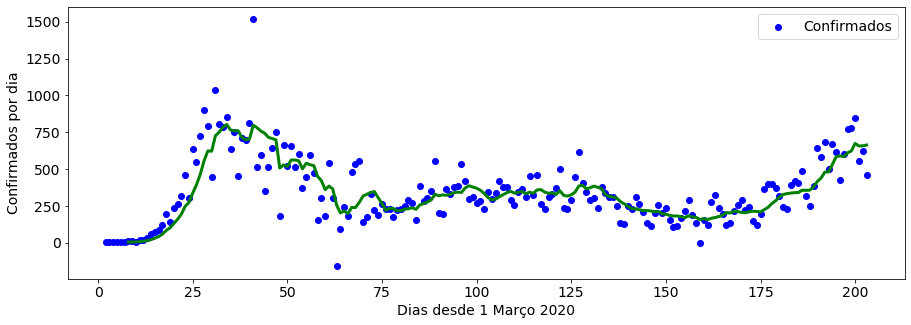

In [57]:
x = list(df.iloc[:,1])
y1 = list(df.iloc[:,5])
y2 = list(df.iloc[:,7])

plt.rcParams['figure.figsize'] = [15, 5]
plt.rc('font', size=14)

# Real data
plt.scatter(x,y1,label="Confirmados",color="blue")
plt.plot(x,y2,color="green",linewidth=3)
plt.legend()
plt.xlabel("Dias desde 1 Março 2020")
plt.ylabel("Confirmados por dia")
plt.show()



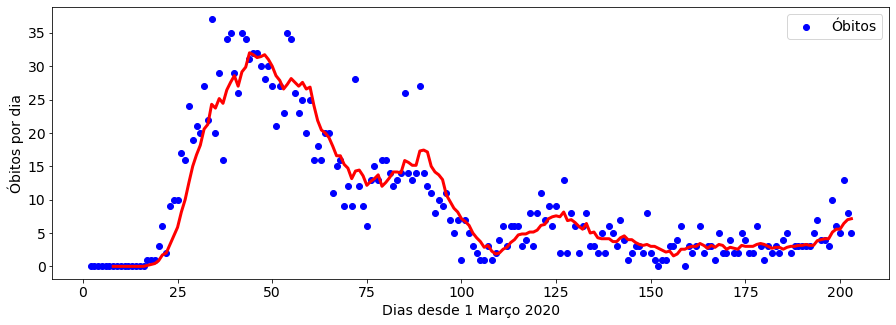

In [53]:
x = list(df.iloc[:,1])
y1 = list(df.iloc[:,6])
y2 = list(df.iloc[:,8])

plt.rcParams['figure.figsize'] = [15, 5]
plt.rc('font', size=14)

# Real data
plt.scatter(x,y1,label="Óbitos",color="blue")
plt.plot(x,y2,color="red",linewidth=3)
plt.legend()
plt.xlabel("Dias desde 1 Março 2020")
plt.ylabel("Óbitos por dia")
plt.show()